# Graficas de error
El objetivo de este programa es realizar una comparación entre los resultados de experimentos de diferentes días y calcular la diferencia que haya entre sus valores.


# Ingesta de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import math as ma
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Obtener el nombre de los datasets y las concentraciones
path = 'first'
path2 = 'second'
first_experiment = glob.glob(path + "/[c]*.csv" )
second_experiment = glob.glob(path2 + "/[c]*.csv" )

concentraciones = []
concentraciones2 = []

for item in first_experiment:
      concentraciones.append(item[item.find("c")+1:item.find(".")])

for item in second_experiment:
      concentraciones2.append(item[item.find("c")+1:item.find(".")])

print(first_experiment)
print(second_experiment)




['first/c60.csv', 'first/c0.csv', 'first/c100.csv', 'first/c20.csv', 'first/c40.csv', 'first/c80.csv']
['second/c60.csv', 'second/c0.csv', 'second/c100.csv', 'second/c20.csv', 'second/c40.csv', 'second/c80.csv']


In [3]:
# Abrir los dataframes y guardarlos en una lista

#first experiment
lu= [pd.read_csv(filename, sep=",") for filename in first_experiment] 
dfconditions = [pd.read_csv(filename, header= None, sep="\t") for filename in first_experiment]  #para las condiciones

#second experiment
lu2= [pd.read_csv(filename, sep=",") for filename in second_experiment] 
dfconditions2 = [pd.read_csv(filename, header= None, sep="\t") for filename in second_experiment]  #para las condiciones


## Escoger scan deseado

In [4]:
li = lu[:]
n=0
for n in range(0,len(lu),1):
    li[n]= lu[n][lu[n]['Scan']==3]

li2 = lu2 [:]
n=0
for n in range(0,len(lu2),1):
    li2[n]= lu2[n][lu2[n]['Scan']==3]


# Graficar experimentos

### Graficar primer experimento

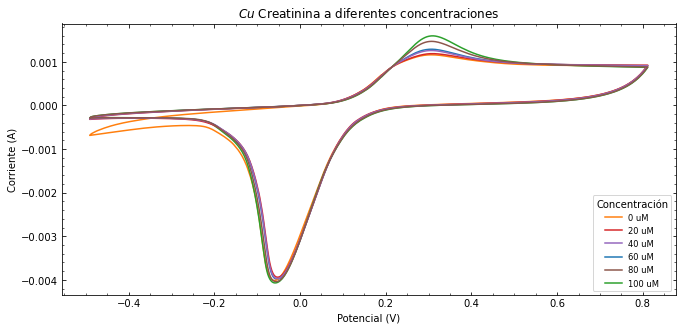

In [5]:

n=0
fig, ax = plt.subplots()  # con esto puedo hacer varias charts en un figure
fig.set_size_inches(11, 5)  # defino el tamaño de la grafica
plt.rc('legend', fontsize='small') # el tamaño de la leyenda
for item in li:
    ax.plot(item["WE(1).Potential (V)"]+.210, item["WE(1).Current (A)"], label='{} uM'.format(concentraciones[n]))
    n= n+1

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [1,3,4,0,5,2]

plt.ylabel("Corriente (A)")
plt.xlabel("Potencial (V)")
plt.title("$Cu$ Creatinina a diferentes concentraciones")

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'lower right', title= "Concentración") 
plt.minorticks_on()
plt.tick_params(which='both',top=True, right=True, axis='both', direction='in')
plt.savefig("Cu_first.png", dpi=300)
plt.show()

### Segundo experimento

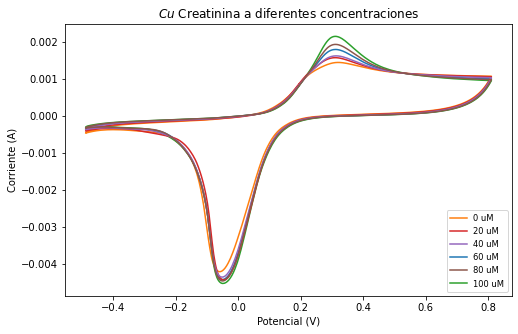

In [6]:
n=0
fig, ax = plt.subplots()  # con esto puedo hacer varias charts en un figure
fig.set_size_inches(8, 5)  # defino el tamaño de la grafica
plt.rc('legend', fontsize='small') # el tamaño de la leyenda
for item in li2:
    ax.plot(item["WE(1).Potential (V)"]+.210, item["WE(1).Current (A)"], label='{} uM'.format(concentraciones[n]))
    n= n+1

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [1,3,4,0,5,2]


plt.ylabel("Corriente (A)")
plt.xlabel("Potencial (V)")
plt.title("$Cu$ Creatinina a diferentes concentraciones")

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'lower right') 

plt.savefig("Cu_second.png", dpi=300)
plt.show()

# Exportación de DataFrame

#### Primer experimento

In [12]:
n=0
data = []
for item in li:
    data.append([item["WE(1).Potential (V)"]+.210, item["WE(1).Current (A)"]])
    n= n+1
    
print(concentraciones)
names = ['60 uMP','60 uMA','0 uMP','0 uMA','100 uMP','100 uMA','20 uMP','20 uMA','40 uMP','40 uMA','80 uMP','80 uMA']

['60', '0', '100', '20', '40', '80']


In [13]:
listones = []
for item in data:
    listones.append(item[0])
    listones.append(item[1])

df1 = pd.DataFrame(listones).transpose()
df1.columns=names

#### Segundo experimento

In [14]:
n=0
data2 = []
for item in li2:
    data2.append([item["WE(1).Potential (V)"]+.210, item["WE(1).Current (A)"]])
    n= n+1

listones2 = []
for item in data2:
    listones2.append(item[0])
    listones2.append(item[1])

df2 = pd.DataFrame(listones2).transpose()
df2.columns=names


In [73]:
df1_1 = df1.reindex(columns=['0 uMP','0 uMA','20 uMP','20 uMA','40 uMP','40 uMA','60 uMP','60 uMA','80 uMP','80 uMA','100 uMP','100 uMA'])
df2_2 = df2.reindex(columns=['0 uMP','0 uMA','20 uMP','20 uMA','40 uMP','40 uMA','60 uMP','60 uMA','80 uMP','80 uMA','100 uMP','100 uMA'])

# Rango del pico a analizar

In [5]:
#Condiciones para el data frame
n=0
for item in li:
    dfconditions[n] = + item[(item['WE(1).Potential (V)'] >= 0) & (item['WE(1).Potential (V)'] <= 0.3 )]
    n= n+1

n=0
for item in li2:
    dfconditions2[n] = + item[(item['WE(1).Potential (V)'] >= 0) & (item['WE(1).Potential (V)'] <= 0.3 )]
    n= n+1

## Obtención de valores máximos


### Primer experimento

In [6]:
# listas para guardar los valores máximos de corriente y el valor del indice
max_values = []
max_index = []
p_values = []
colup = []
colu = []



In [7]:
# guardar una columna de corriente y una columna de potencial
for item in li:
    colup.append(item['WE(1).Potential (V)'])
    colu.append(item['WE(1).Current (A)'])

In [8]:
# guardar valores maximos de corriente  y su indice
for item in dfconditions:
    max_values.append(item['WE(1).Current (A)'].max())
    max_index.append(item['WE(1).Current (A)'].idxmax())

In [9]:
# crear lista de potenciales
n=0
for item in max_index:
    p_values.append(colup[n][item])
    n=n+1

### Segundo experimento


In [10]:
max_values2 = []
max_index2 = []
p_values2 = []
colup2 = []
colu2 = []

In [11]:


for item in li2:
    colup2.append(item['WE(1).Potential (V)'])
    colu2.append(item['WE(1).Current (A)'])

for item in dfconditions2:
    max_values2.append(item['WE(1).Current (A)'].max())
    max_index2.append(item['WE(1).Current (A)'].idxmax())

n=0
for item in max_index2:
    p_values2.append(colup2[n][item])
    n=n+1

## Grafica de valores máximos y pico analizado

### Primer experimento

In [12]:
# hacer que las listas puedan ser graficadas
y2_array = np.asarray(p_values)
y2 = y2_array.reshape(-1,1)

x_array = np.asarray(max_values)
x = x_array.reshape(-1, 1)

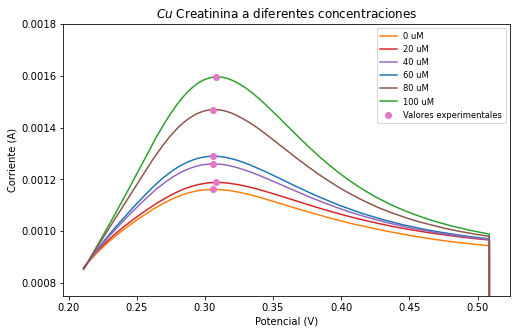

In [15]:
n=0
fig, ax = plt.subplots()  
fig.set_size_inches(8, 5)
plt.rc('legend', fontsize='small')
for item in dfconditions:
    ax.plot(item["WE(1).Potential (V)"]+.210, item["WE(1).Current (A)"], label='{} uM'.format(concentraciones[n]))
    n=n+1


ax.plot(y2+.210, x, "o",label="Valores experimentales")

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [1,3,4,0,5,2,6]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

ax.set_ylim([0.00075, .0018])
plt.ylabel("Corriente (A)")
plt.xlabel("Potencial (V)")
plt.title("$Cu$ Creatinina a diferentes concentraciones")
plt.savefig("Cu_filtrado_first.png", dpi=300)

plt.show()

### Segundo experimento

In [13]:
# hacer que las listas puedan ser graficadas
y2_array2 = np.asarray(p_values2)
y22 = y2_array2.reshape(-1,1)

x_array2 = np.asarray(max_values2)
x2 = x_array2.reshape(-1, 1)

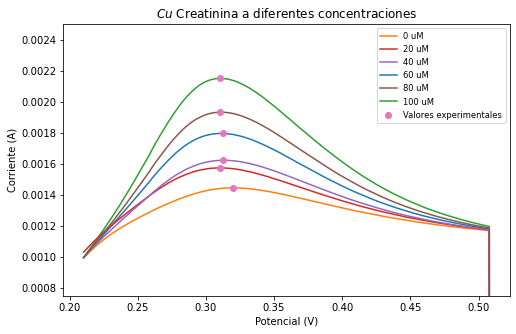

In [17]:
n=0
fig, ax = plt.subplots()  
fig.set_size_inches(8, 5)
plt.rc('legend', fontsize='small')
for item in dfconditions2:
    ax.plot(item["WE(1).Potential (V)"]+.210, item["WE(1).Current (A)"], label='{} uM'.format(concentraciones[n]))
    n=n+1

ax.plot(y22+.210, x2, "o",label="Valores experimentales")

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [1,3,4,0,5,2,6]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

ax.set_ylim([0.00075, .0025])
plt.ylabel("Corriente (A)")
plt.xlabel("Potencial (V)")
plt.title("$Cu$ Creatinina a diferentes concentraciones")
plt.savefig("Cu_filtrado_second.png", dpi=300)

plt.show()

# Realizar promedio entre listas valores de corriente máximos

In [14]:
df = pd.DataFrame()


In [15]:
df['Corriente 1']=max_values
df['Corriente 2']=max_values2

In [16]:
estandar = df.std(axis=1)
promedio = df.mean(axis=1)

In [17]:
df['mean']=promedio
df['std']= estandar
df['[M]']= [60,0,100,20,40,80]

In [18]:
# ordenar data frame sin perder relaciones
by_concentracion = df.sort_values('[M]', ascending=True)
print(by_concentracion,index=False)

   Corriente 1  Corriente 2      mean       std  [M]
1     0.001161     0.001445  0.001303  0.000201    0
3     0.001188     0.001573  0.001381  0.000273   20
4     0.001259     0.001623  0.001441  0.000257   40
0     0.001289     0.001796  0.001542  0.000358   60
5     0.001469     0.001932  0.001701  0.000327   80
2     0.001596     0.002150  0.001873  0.000392  100


In [19]:
by_concentracion.to_csv("regresion.csv")

# Regresion lineal con nuevos valores

In [35]:
x_arreglo= df.loc[:,"[M]"].values.reshape(-1,1) # x es concentracion aqui
y_arreglo = df.loc[:,"mean"].values.reshape(-1,1) # y es corriente aqui
regr = linear_model.LinearRegression()


In [38]:
std_arreglo = df.loc[:,"std"]
print(std_arreglo)


0    0.000358
1    0.000201
2    0.000392
3    0.000273
4    0.000257
5    0.000327
Name: std, dtype: float64


In [28]:
regr.fit(x_arreglo,y_arreglo)
y_pre = regr.predict(x_arreglo)


In [32]:
#Coeficientes
m = regr.coef_[0][0]
b = regr.intercept_[0]
r2 = r2_score(y_arreglo, y_pre)
print(m , b, r2)

5.586460658482e-06 0.0012607465471540001 0.95844568899467


# Gráfica de error

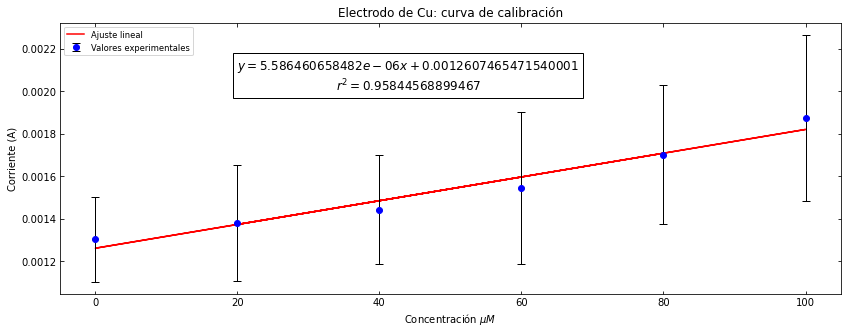

In [76]:

fig = plt.figure(figsize=(14, 5))
plt.plot(x_arreglo,m *x_arreglo + b , label="Ajuste lineal", color = 'red') # regresión lineal
plt.text(20, .002, f'$y={m}x+{b}$\n$r^2={r2}$',multialignment='center' ,fontsize=12, bbox={'facecolor': 'white'})
plt.errorbar(df.loc[:,"[M]"] , df.loc[:,"mean"], yerr= df.loc[:,"std"], linestyle="None",  fmt="ob",linewidth=1,  capsize=4,  ecolor="k", label='Valores experimentales')
plt.legend(loc= 'upper left')
plt.ylabel("Corriente (A)")
plt.xlabel("Concentración $\mu M$")
plt.title("Electrodo de Cu: curva de calibración")
plt.tick_params(top=True, right=True, axis='both', direction='in')
plt.savefig("Cu_regresion_modificada.png", dpi=300)
plt.show()


